In [593]:
# Import necessary libraries
import pandas as pd
import numpy as np
import pingouin as pg
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
# Filter FutureWarnings
warnings.filterwarnings("ignore")

# Load the dataset from the URL
df = pd.read_csv('https://s3.amazonaws.com/talent-assets.datacamp.com/product_sales.csv')

# Set options to display columns for data inspection
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Verify data types
print(df.dtypes)

# Change data type of week to category
df['week'] = df['week'].astype('category')

# Inspect unique value counts for week column
week_counts = df['week'].value_counts()
print(week_counts)

# Inspect unique value counts for nb_sold column
sold_counts = df['nb_sold'].value_counts()
print(sold_counts)

# Replace values in sales_method column using a dictionary
replace_dict = {'email': 'Email', 'em + call': 'Email + Call'}
df['sales_method'] = df['sales_method'].replace(replace_dict)
method_counts = df['sales_method'].value_counts()
print(method_counts)

# Drop any outliers from years_as_customer ==> company established in 1984 ==> max customer years 40
df = df[df['years_as_customer'] <= 40]
# Inspect unique value counts for years_as_customer column
years_counts = df['years_as_customer'].value_counts()
print(years_counts)

# Inspect unique value counts for nb_site_visits column
visit_counts = df['nb_site_visits'].value_counts()
print(visit_counts)

# Inspect unique value counts for state column ==> customers in all 50 states - no spelling errors
state_counts = df['state'].value_counts()
print(state_counts)

# Sort values by likelyhood to affect revenue
df.sort_values(by=['sales_method', 'week', 'nb_sold'], inplace=True)
# Interpolate missing values
df['revenue'].interpolate(method='linear', inplace=True)

# Drop duplicates
df.drop_duplicates()

dfe = df[df['sales_method'] == 'Email']
dfc = df[df['sales_method'] == 'Call']
dfec = df[df['sales_method'] == 'Email + Call']

# Data inspection
print(df.isnull().sum())
print(df.dtypes)
print(df.info())
print(df.describe())
print("Revenue Total: " + str(df['revenue'].sum()))
print(dfe.describe())
print("Revenue Email: " + str(dfe['revenue'].sum()))
print(dfc.describe())
print("Revenue Call: " + str(dfc['revenue'].sum()))
print(dfec.describe())
print("Revenue Email+Call: " + str(dfec['revenue'].sum()))

# Investigate weekly sales by sales method
eweek_counts = dfe['week'].value_counts()
print(eweek_counts)
cweek_counts = dfc['week'].value_counts()
print(cweek_counts)
ecweek_counts = dfec['week'].value_counts()
print(ecweek_counts)

# Investigate number sold by sales method
esold_counts = dfe['nb_sold'].value_counts()
print(esold_counts)
csold_counts = dfc['nb_sold'].value_counts()
print(csold_counts)
ecsold_counts = dfec['nb_sold'].value_counts()
print(ecsold_counts)

# Tukey's HSD post-hoc test
posthoc_rev = pg.pairwise_tukey(dv='revenue', between='sales_method', data=df)
print(posthoc_rev)

# Perform ANOVA
anova_results = pg.anova(dv='revenue', between='sales_method', data=df)
print(anova_results)

week                   int64
sales_method          object
customer_id           object
nb_sold                int64
revenue              float64
years_as_customer      int64
nb_site_visits         int64
state                 object
dtype: object
week
1    3721
4    2575
5    2574
2    2491
3    2411
6    1228
Name: count, dtype: int64
nb_sold
10    3677
9     3535
11    2439
8     1941
12    1088
13     939
7      698
15     555
14      97
16      31
Name: count, dtype: int64
sales_method
Email           7466
Call            4962
Email + Call    2572
Name: count, dtype: int64
years_as_customer
1     2504
2     1987
3     1619
0     1471
4     1338
5     1118
6      918
7      709
8      608
9      509
10     405
11     318
12     284
13     239
14     167
15     150
16     123
17      88
18      82
19      58
20      54
22      43
21      37
24      27
26      22
23      21
25      19
27      15
30       9
33       8
34       8
28       8
31       6
32       5
29       5
35       5
36 

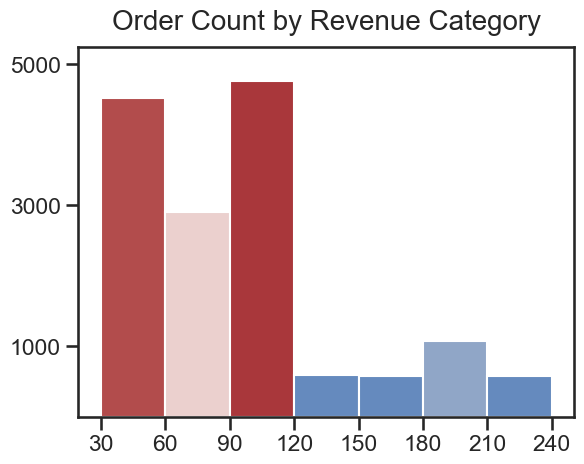

<function matplotlib.pyplot.clf() -> 'None'>

In [326]:
# Histogram visualising spread of revenue
bins = [30, 60, 90, 120, 150, 180, 210, 240]
hist_data = sns.histplot(data=df, x='revenue', bins=bins, kde=False)
# Get the counts for each bin
counts, edges = np.histogram(df['revenue'], bins=bins)
# Define a colormap
cmap = plt.get_cmap('vlag')  # Red for high counts, green for low counts
# Normalize the counts to the range [0, 1]
norm_counts = counts / counts.max()
# Color each bar based on the normalised count
for bar, norm_count in zip(hist_data.patches, norm_counts):
    color = cmap(norm_count)
    bar.set_facecolor(color)
# Customise y-ticks
plt.ylim(0, counts.max() * 1.1)
ax = plt.gca()
ytick_positions = [1000, 3000, 5000] 
ytick_labels = ['1000', '3000', '5000']
ax.set_yticks(ytick_positions)
ax.set_yticklabels(ytick_labels)
plt.title('Order Count by Revenue Category', fontsize=20, y=1.025)
plt.xlabel('')
plt.ylabel('')
plt.xticks(ticks=bins)
plt.show()
plt.clf

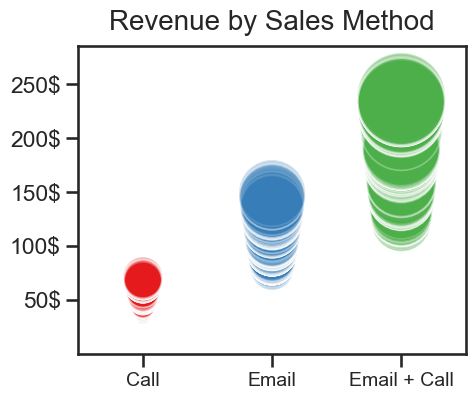

<Figure size 640x480 with 0 Axes>

In [591]:
# Scatter plot  chart of store_size, num_employees, and revenue
plt.figure(figsize=(5, 4))
sns.scatterplot(x='sales_method', y='revenue', size='revenue', data=df, hue='sales_method', palette='Set1', sizes=(50, 4000), legend=False, alpha=0.3)
ax = plt.gca()
ytick_positions = [50, 100, 150, 200, 250] 
ytick_labels = ['50$', '100$', '150$', '200$', '250$']
ax.set_yticks(ytick_positions)
ax.set_yticklabels(ytick_labels)
plt.tick_params(axis='x', labelsize=14)
plt.xlim(-0.5, 2.5) # Brings x ticks away from edges of the plot
plt.ylim(0, df['revenue'].max() * 1.2)
plt.title('Revenue by Sales Method', fontsize=20, y=1.025)
plt.xlabel('')
plt.ylabel('')
plt.show()
plt.clf()

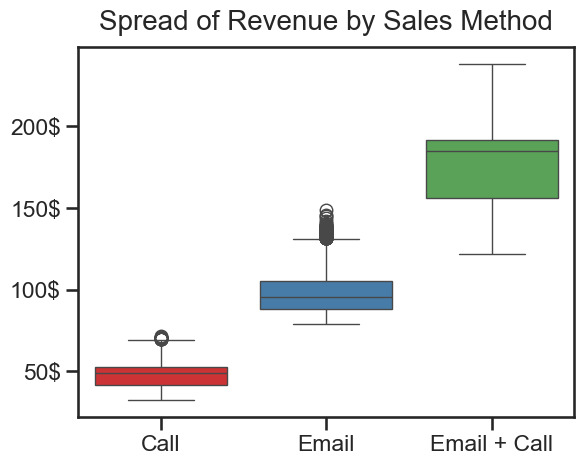

<Figure size 640x480 with 0 Axes>

In [595]:
# Box plot visualising spread of revenue by Sales Method
box_order = ['Call', 'Email', 'Email + Call']
sns.boxplot(x='sales_method', y='revenue', data=df, hue='sales_method', palette='Set1', order=box_order)
ax = plt.gca()
ytick_positions = [50, 100, 150, 200] 
ytick_labels = ['50$', '100$', '150$', '200$']
ax.set_yticks(ytick_positions)
ax.set_yticklabels(ytick_labels)
plt.title('Spread of Revenue by Sales Method', fontsize=20, y=1.025)
plt.xlabel('')
plt.ylabel('')
plt.show()
plt.clf()

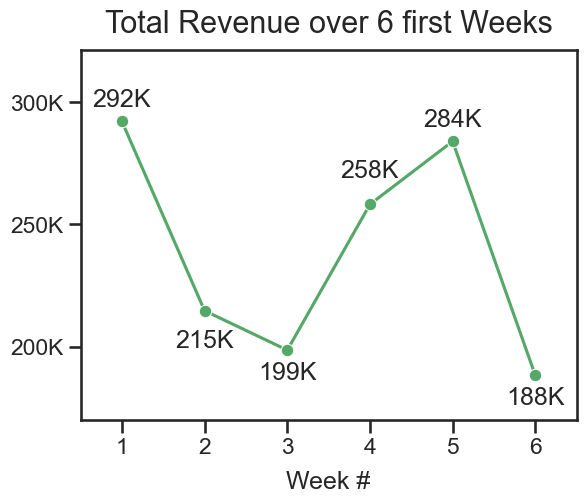

<Figure size 640x480 with 0 Axes>

In [685]:
# Aggregate the data by week and sales method, summing the revenue
df_week = df.groupby(['week'])['revenue'].sum().reset_index()
# Line plot for weekly revenue by Sales Method
sns.lineplot(data=df_week, x='week', y='revenue', color='g', marker='o', legend=False)
# Display call-out values for each week
offsets = [6000, -15000, -12000, 11000, 6000, -12000]  # Different offsets for each label
for i in range(len(df_week)):
    revenue_k = round(df_week['revenue'][i] / 1000)
    plt.text(df_week['week'][i], df_week['revenue'][i] + offsets[i], f"{revenue_k}K", ha='center')
ax = plt.gca()
ytick_positions = [200000, 250000, 300000] 
ytick_labels = ['200K', '250K', '300K']
ax.set_yticks(ytick_positions)
ax.set_yticklabels(ytick_labels)
plt.ylim(170000, df_week['revenue'].max() * 1.1)
plt.xlim(0.5, 6.5)
plt.title('Total Revenue over 6 first Weeks', fontsize=22, y=1.025)
plt.xlabel('Week #', labelpad=10)
plt.ylabel('')
plt.show()
plt.clf()

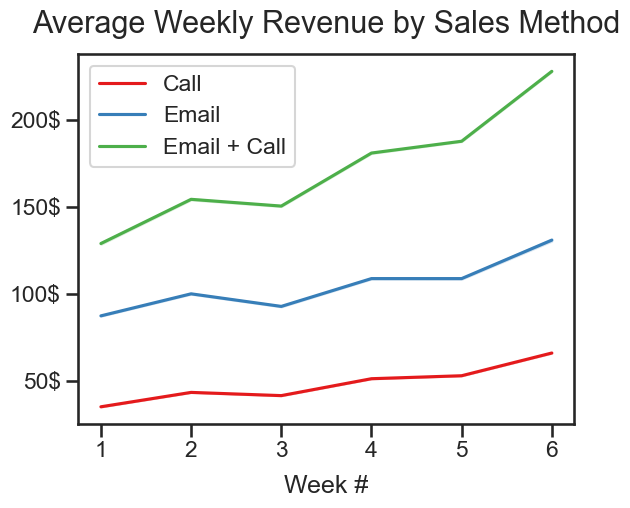

<Figure size 640x480 with 0 Axes>

In [633]:
# Line plot for weekly revenue by Sales Method
sns.lineplot(x='week', y='revenue', hue='sales_method', palette='Set1', data=df)
ax = plt.gca()
ytick_positions = [50, 100, 150, 200] 
ytick_labels = ['50$', '100$', '150$', '200$']
ax.set_yticks(ytick_positions)
ax.set_yticklabels(ytick_labels)
plt.title('Average Weekly Revenue by Sales Method', fontsize=22, y=1.035)
plt.legend(title='')
plt.xlabel('Week #', labelpad=10)
plt.ylabel('')
plt.show()
plt.clf()

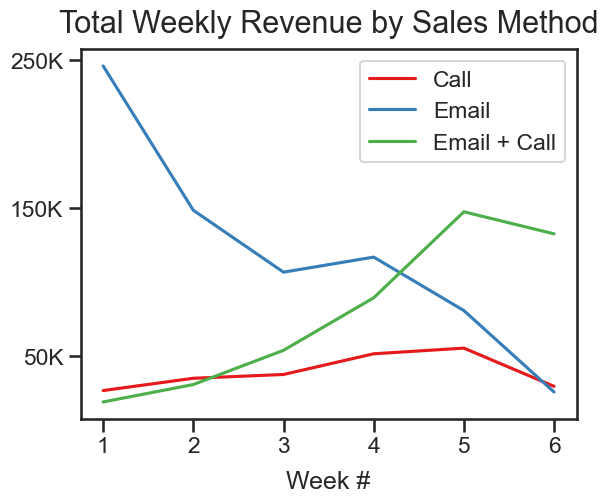

<Figure size 640x480 with 0 Axes>

In [687]:
# Aggregate the data by week and sales method, summing the revenue
df_sum = df.groupby(['week', 'sales_method'])['revenue'].sum().reset_index()
# Line plot for weekly revenue by Sales Method
sns.lineplot(x='week', y='revenue', hue='sales_method', palette='Set1', data=df_sum)
ax = plt.gca()
ytick_positions = [50000, 150000, 250000] 
ytick_labels = ['50K', '150K', '250K']
ax.set_yticks(ytick_positions)
ax.set_yticklabels(ytick_labels)
plt.title('Total Weekly Revenue by Sales Method', fontsize=22, y=1.0235)
plt.legend(title='')
plt.xlabel('Week #', labelpad=10)
plt.ylabel('')
plt.show()
plt.clf()

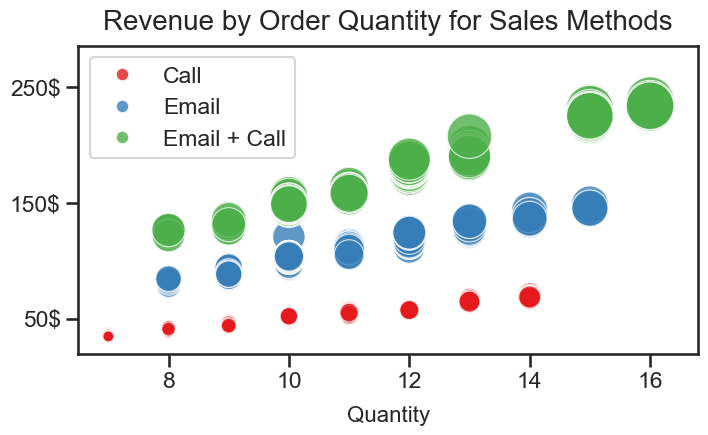

<Figure size 640x480 with 0 Axes>

In [691]:
# Scatter plot  chart of store_size, num_employees, and revenue
plt.figure(figsize=(8, 4))
scatter = sns.scatterplot(x='nb_sold', y='revenue', size='revenue', data=df, hue='sales_method', palette='Set1', sizes=(50, 1200), alpha=0.8)
ax = plt.gca()
xtick_positions = [8, 10, 12, 14, 16] 
xtick_labels = ['8', '10', '12', '14', '16']
ax.set_xticks(xtick_positions)
ax.set_xticklabels(xtick_labels)
ytick_positions = [50, 150, 250] 
ytick_labels = ['50$', '150$', '250$']
ax.set_yticks(ytick_positions)
ax.set_yticklabels(ytick_labels)
#plt.tick_params(axis='x', labelsize=14)
#plt.xlim(-0.3, 2.3) # Brings x ticks away from edges of the plot
plt.ylim(20, df['revenue'].max() * 1.2)
plt.xlim(6.5, df['nb_sold'].max() * 1.05)
plt.title('Revenue by Order Quantity for Sales Methods', fontsize=20, y=1.025)
plt.xlabel('Quantity', fontsize=16, labelpad=10)
plt.ylabel('')
# Manually create the legend for sales_method colors
handles, labels = scatter.get_legend_handles_labels()
unique_labels = list(df['sales_method'].unique())
# Filter out the handles and labels for sales_method only
sales_method_handles = [handle for handle, label in zip(handles, labels) if label in unique_labels]
sales_method_labels = [label for label in labels if label in unique_labels]
plt.legend(handles=sales_method_handles, labels=sales_method_labels, title='', loc='upper left')
plt.show()
plt.clf()

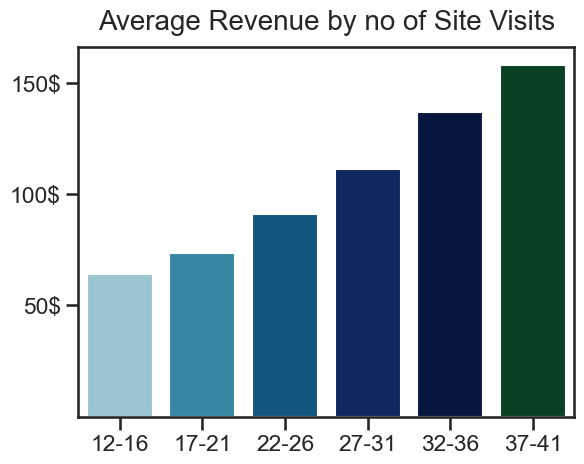

<Figure size 640x480 with 0 Axes>

In [689]:
# Barplot for average revenue by nb_site_visits
bins = range(12, 43, 5)
labels = [f'{i}-{i+4}' for i in bins[:-1]]
df['nb_site_visits_bin'] = pd.cut(df['nb_site_visits'], bins=bins, labels=labels, right=False)
rev_visits = df.groupby('nb_site_visits_bin')['revenue'].mean().reset_index()
sns.barplot(data=rev_visits, x='nb_site_visits_bin', y='revenue', hue='nb_site_visits_bin', palette='ocean_r', legend=False)
ax = plt.gca()
ytick_positions = [50, 100, 150] 
ytick_labels = ['50$', '100$', '150$']
ax.set_yticks(ytick_positions)
ax.set_yticklabels(ytick_labels)
plt.title('Average Revenue by No. Site Visits', fontsize=20, y=1.025)
plt.xlabel('')
plt.ylabel('')
plt.show()
plt.clf()

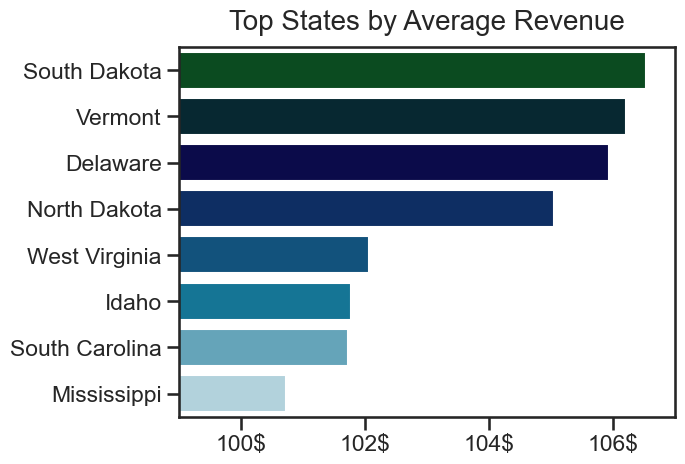

<Figure size 640x480 with 0 Axes>

In [695]:
# Horizontal Barplot for average revenue in top performing states
rev_state = df.groupby('state')['revenue'].mean().reset_index()
rev_state = rev_state.sort_values(by='revenue', ascending=False)
top_8_states = rev_state.head(8)
sns.barplot(x='revenue', y='state', data=top_8_states, hue='state', palette='ocean')
ax = plt.gca()
xtick_positions = [100, 102, 104, 106] 
xtick_labels = ['100$', '102$', '104$', '106$']
ax.set_xticks(xtick_positions)
ax.set_xticklabels(xtick_labels)
plt.title('Top States by Average Revenue', fontsize=20, y=1.025)
plt.xlabel('')
plt.ylabel('')
plt.xlim(99, 107)
plt.show()
plt.clf()